**dataset** source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/code

# **Import Libraries**

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
import pickle
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Project 3 - Car Price Prediction/car_price_prediction.csv")
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


# **Evaluate Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

# **Clean the Dataset**

In [ ]:
df.duplicated().sum()

313

Terdapat 313 data yang duplikat

In [ ]:
# menghapus data yang duplikat
df = df.drop_duplicates()

In [ ]:
# melihat total data yang bernilai null untuk masing-masing kolom
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.0
Price,0,0.0
Color,0,0.0
Wheel,0,0.0
Doors,0,0.0
Drive wheels,0,0.0
Gear box type,0,0.0
Cylinders,0,0.0
Mileage,0,0.0
Engine volume,0,0.0


## Unique values in each categorical variable:

### Categorical Feature

In [ ]:
columns = df.select_dtypes(include=['object'])
columns.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [ ]:
for column in columns:
  print(f'----------------{column}------------------')
  print(df[column].unique())
  print()

----------------Levy------------------
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1

Dari hasil di atas bisa kita simpulkan bahwa
1.   kolom **Levy** perlu diubah tipenya menjadi float atau integer.
2.   kolom **Engine volume** dan **Mileage** perlu dibersihkan dengan meniadakan string 'turbo' dan 'km', serta merubah tipe data menjadi float atau int.
2.   kolom **Doors** harus didrop karena isinya tidak jelas dan tidak sesuai dengan nama kolom








In [ ]:
df['Levy'] = df['Levy'].replace('-', np.nan)

In [ ]:
df['Levy'] = df['Levy'].apply(lambda x: float(x) if x != None else x)

In [ ]:
# mengisi data yang non-value pada kolom 'Levy' dengan nilai rata-rata
mean_levy = df['Levy'][df['Levy'] != None].mean()
df['Levy'] = df['Levy'].fillna(mean_levy)

In [ ]:
# membersihkan data kolom 'Engine volume'
df['Engine volume'] = df['Engine volume'].apply(lambda x: x.replace(' Turbo', '')).astype(float)

In [ ]:
# membersihkan data kolom 'Engine volume'
df['Mileage'] = df['Mileage'].apply(lambda x: x.replace(' km', '')).astype(int)

In [ ]:
df.drop(columns='Doors', inplace=True)

### Numerical Feature

In [ ]:
num_columns = df.select_dtypes(include=['float', 'int'])

In [ ]:
for column in num_columns:
  print(f'----------------{column}------------------')
  print(df[column].unique())
  print()

----------------ID------------------
[45654403 44731507 45774419 ... 45804997 45793526 45813273]

----------------Price------------------
[13328 16621  8467 ... 56814 63886 22075]

----------------Levy------------------
[ 1399.          1018.           906.29920545   862.
   446.           891.           761.           751.
   394.          1053.          1055.          1079.
   810.          2386.          1850.           531.
   586.          1249.          2455.           583.
  1537.          1288.           915.          1750.
   707.          1077.          1486.          1091.
   650.           382.          1436.          1194.
   503.          1017.          1104.           639.
   629.           919.           781.           530.
   640.           765.           777.           779.
   934.           769.           645.          1185.
  1324.           830.          1187.          1111.
   760.           642.          1604.          1095.
   966.           473.          1138. 

In [ ]:
df['Cylinders'] = df['Cylinders'].apply(lambda x: int(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  int64  
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

## Removing Outliers

In [ ]:
import pandas as pd

# Hitung Q1, Q3, dan IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah untuk outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Hapus outlier
df = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]


## Save Data Unique For App

In [ ]:
# Mendapatkan nilai unik dari beberapa kolom
data_unique = {}
columns_to_save = df.drop(columns='Price').columns

for column in columns_to_save:
    data_unique[column] = df[column].unique()

# Menyimpan nilai unik dalam file pickle
with open('unique_values.pkl', 'wb') as f:
    pickle.dump(data_unique, f)

# **Explatory Data Analysis**

In [ ]:
manufacturer_models = {}

# Iterasi setiap produsen dan simpan daftar modelnya
for manufacturer in df['Manufacturer'].unique():
    models = df['Model'][df['Manufacturer'] == manufacturer].unique()
    manufacturer_models[manufacturer] = models

# Simpan dictionary ke dalam file pickle
with open('manufacturer_models.pkl', 'wb') as f:
    pickle.dump(manufacturer_models, f)

## Numerical Feature

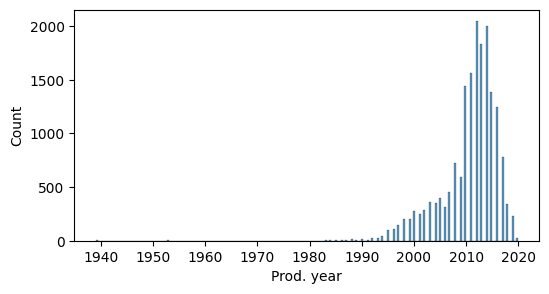

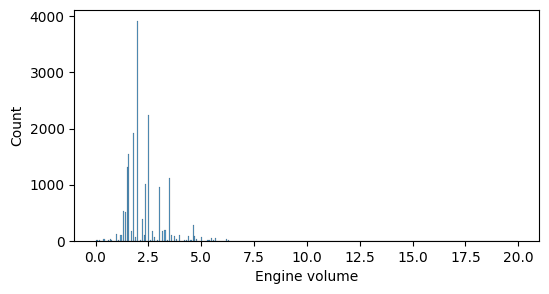

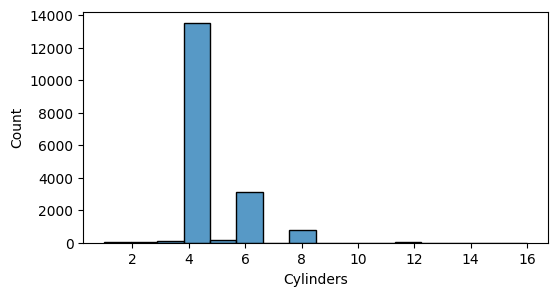

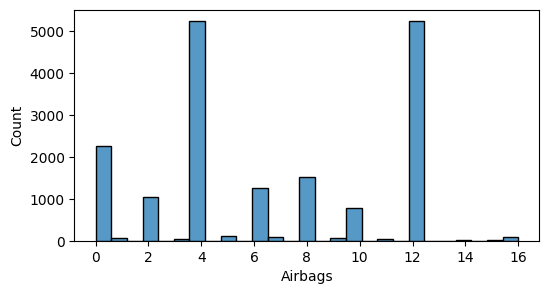

In [ ]:
num_col = ('Prod. year', 'Engine volume', 'Cylinders',
       'Airbags')

for col in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df, x=col)
  # plt.savefig(numerical+'.png')

### Price Distribution

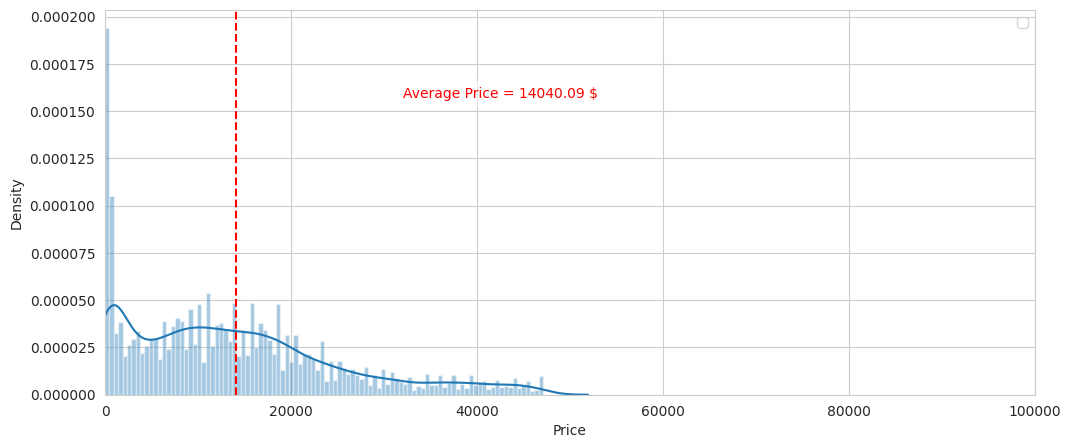

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

sns.distplot(df['Price'], kde=True, bins=100)  # car price distribution

plt.axvline(df['Price'].mean(), c='red', linestyle='dashed')  # create dash line that shows average price for car

plt.text(0.53, 0.8, f'Average Price = {df.Price.mean():.2f} $', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
plt.xlim(0, 100000)  # setting x-axis limit
plt.legend()
plt.show()


Dari data di atas, bisa kita lihat terdapat outlier di sisi atas dan bawah, maka perlu kita singkirkan karena akan mempengaruhi hasil model machine learning nanti. Kita lakukan pembersihan di sesi **Clean the Dataset**

**catatan**: sebelum menghasilkan grafik yang sekarang, tadinya grafik menunjukkan outlier di angka sekitar 2x10^7 $ karena itulah saya memberikan informasi di paragraf 1 mengenai pembersihan outliers

## Categorical Feature

In [ ]:
model_prices = df.groupby('Model')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(10)
model_prices

,Model,Price
754,GS 450,47042.0
1144,Quest 2016,47042.0
1295,Sprinter 316 CDI,47042.0
165,540 I,47042.0
804,Highlander XLE,47042.0
1284,Sportage PRESTIGE,47038.0
335,C 63 AMG,46728.0
594,ES 300 hybrid,46728.0
1152,RAV 4 Dizel,46414.0
1495,macan,46414.0


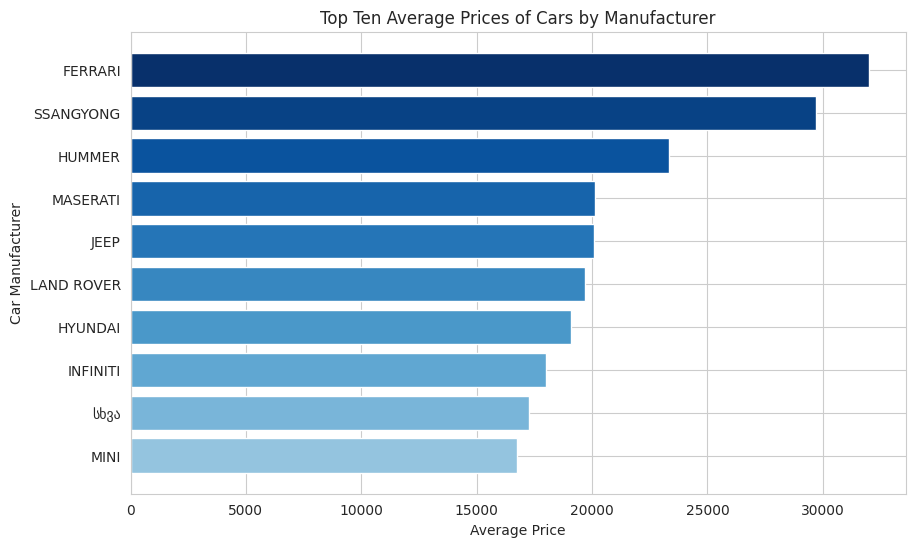

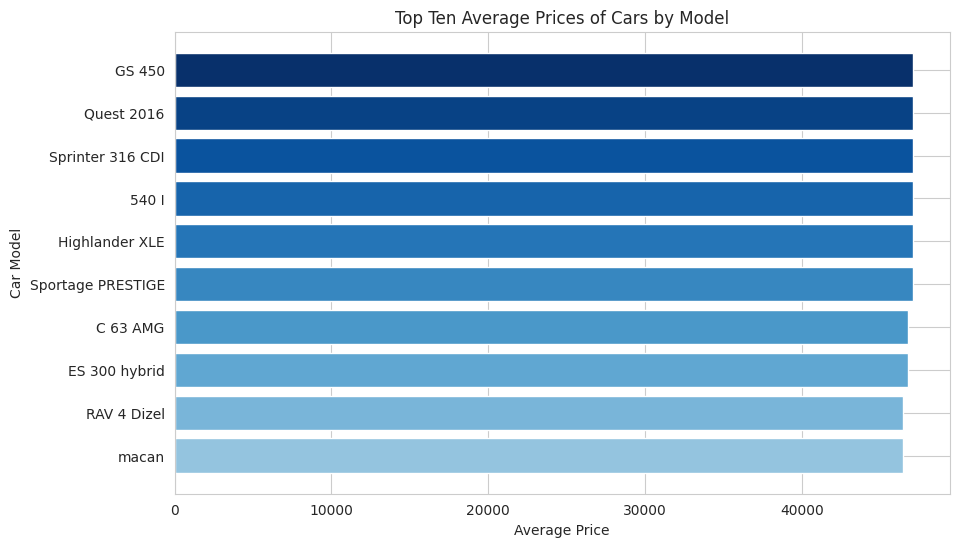

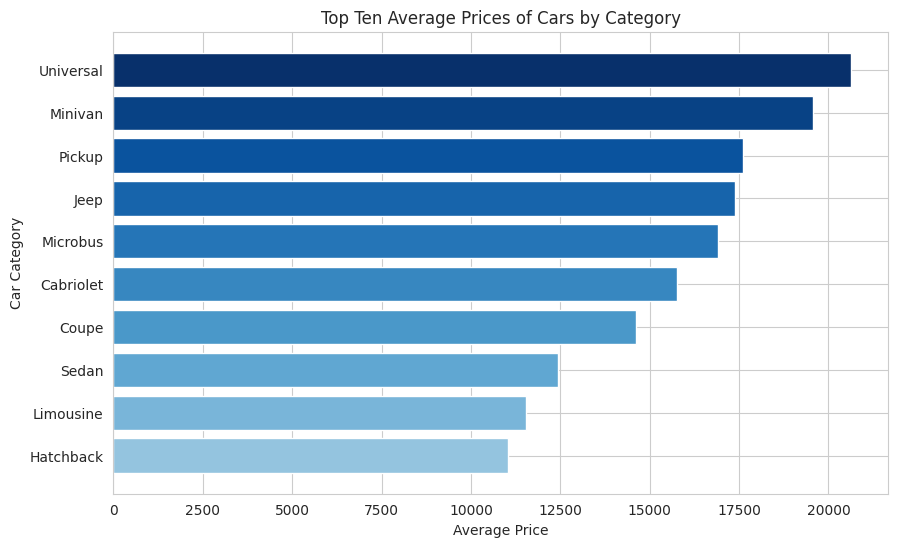

In [ ]:
columns = ('Manufacturer', 'Model', 'Category')
for col in columns:
  cat_prices = df.groupby(col)['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(10)

  plt.figure(figsize=(10, 6))
  plt.barh(cat_prices[col], cat_prices['Price'],
        color=plt.cm.Blues(np.linspace(1, 0.4, len(cat_prices[col]))))

  # Memberikan judul dan label sumbu
  plt.title(f'Top Ten Average Prices of Cars by {col}')
  plt.xlabel('Average Price')
  plt.ylabel(f'Car {col}')
  plt.gca().invert_yaxis()
  plt.show()


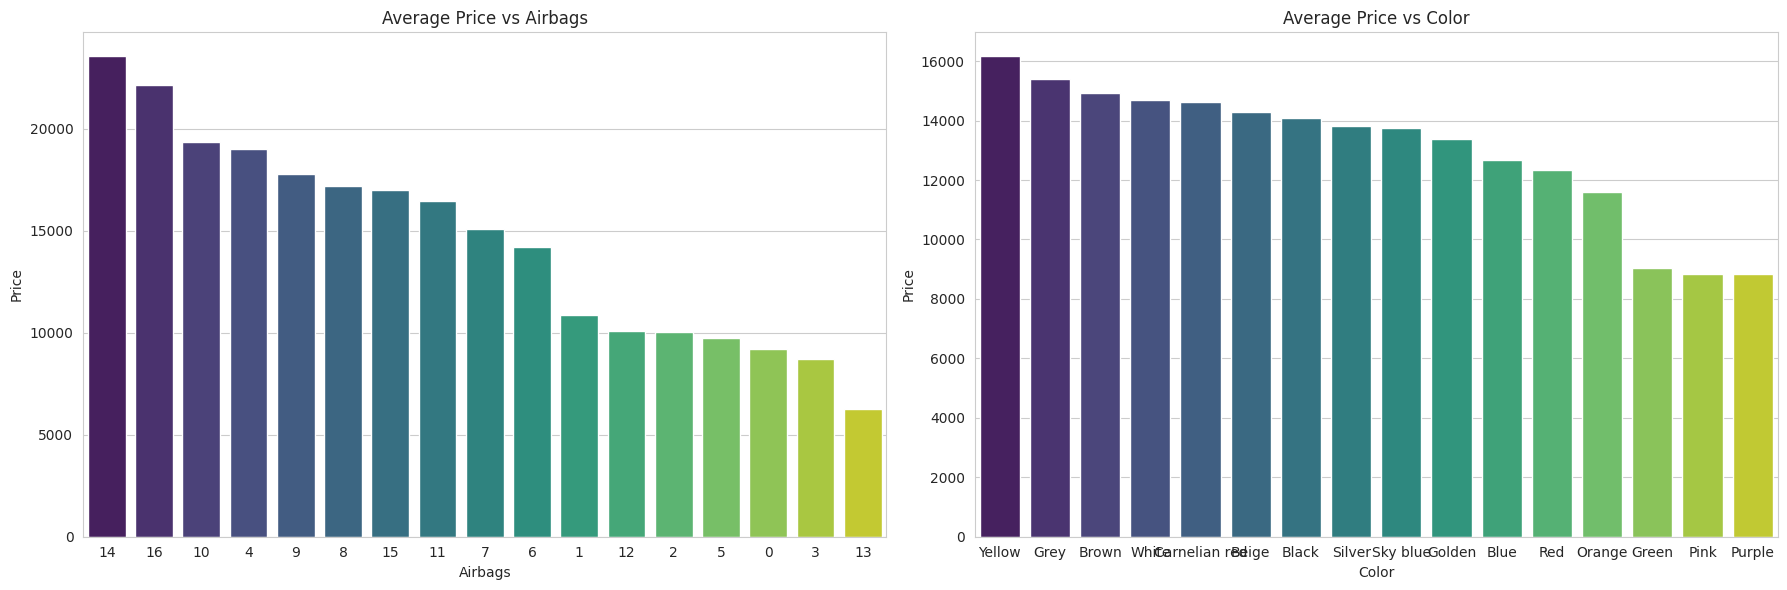

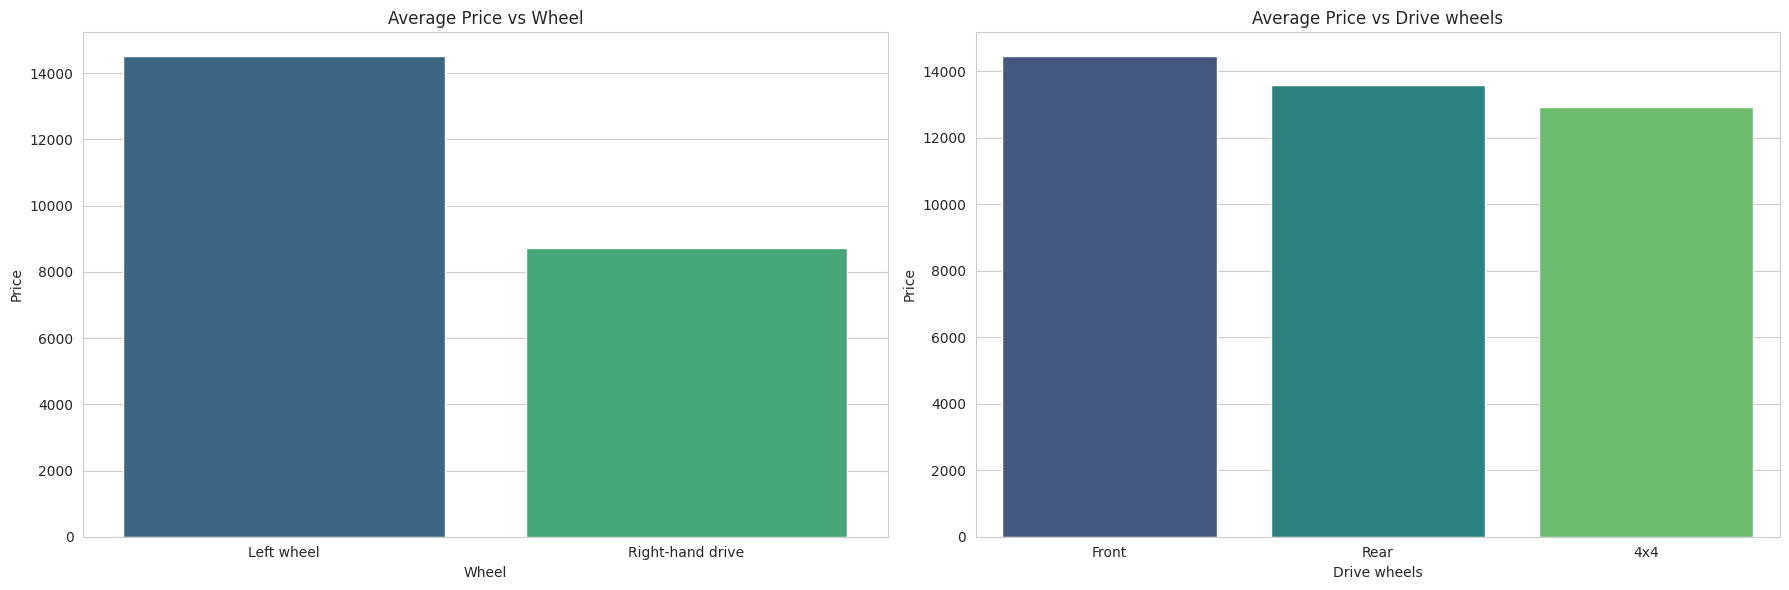

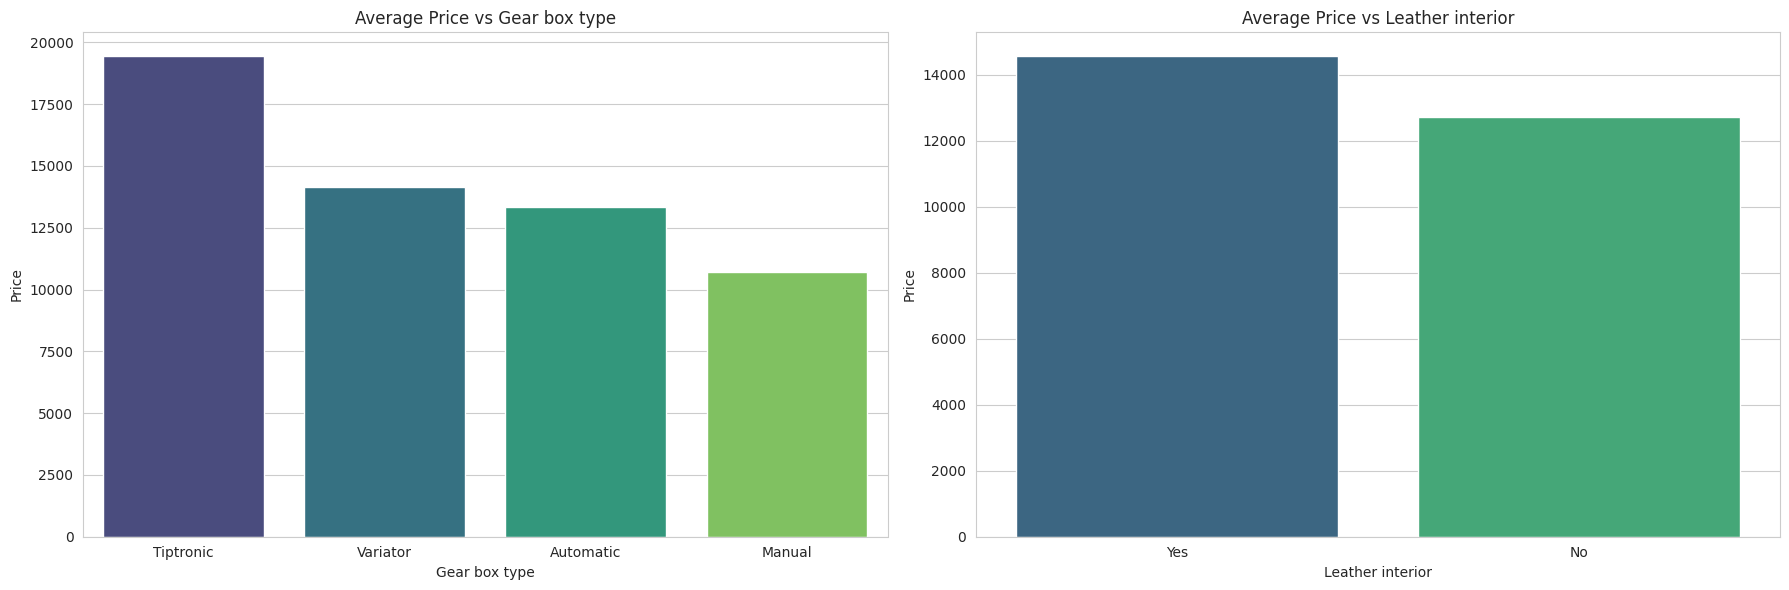

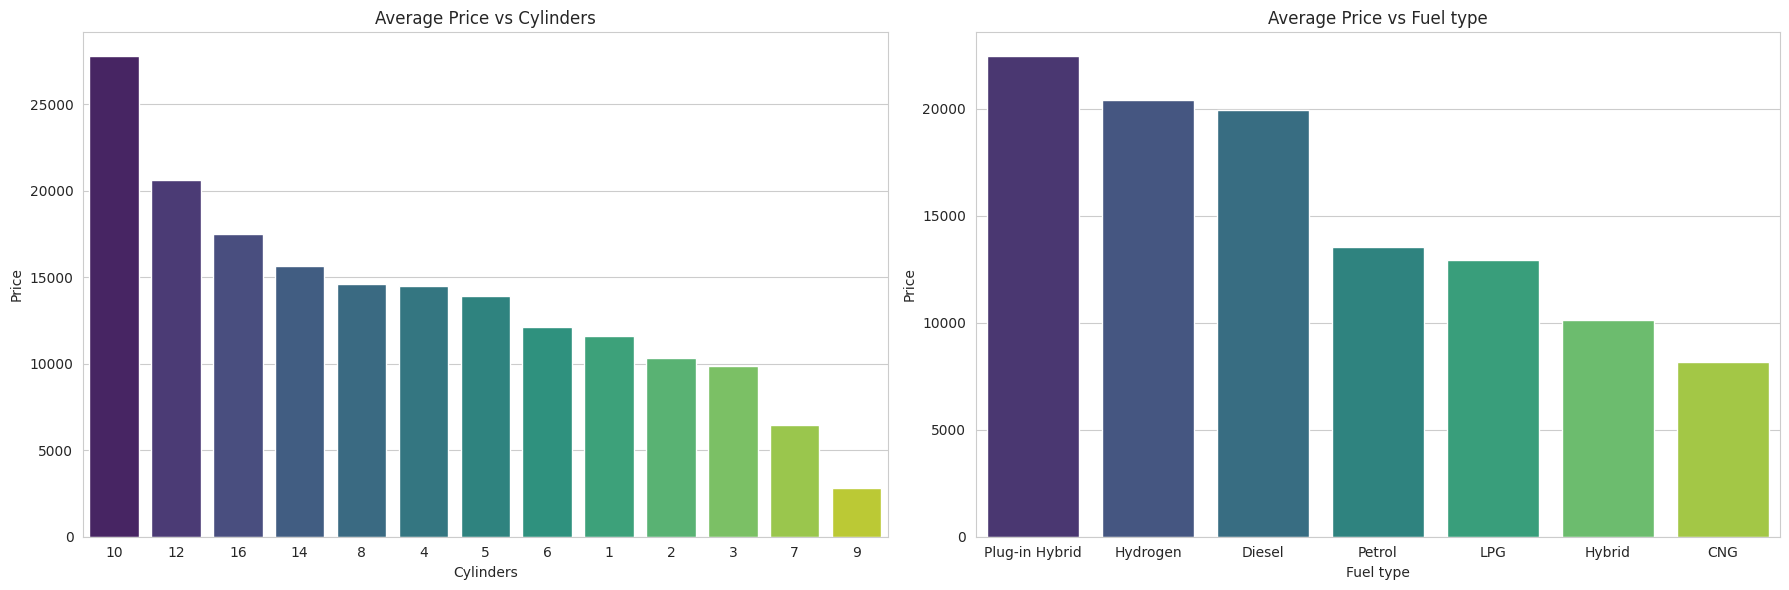

In [ ]:
# List of columns to plot
columns_to_plot = [['Airbags', 'Color'], ['Wheel', 'Drive wheels'], ['Gear box type', 'Leather interior'], ['Cylinders', 'Fuel type']]

# Iterate over the columns and create bar plots
for i in columns_to_plot:
  # Create a 5x2 subplot grid
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  # Flatten the axes for easier iteration
  axes = axes.flatten()
  for j, column in enumerate(i):
      # Sort the data by the average price in descending order
      sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index

      sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[j], ci=None, palette='viridis')
      axes[j].set_title(f'Average Price vs {column}')

  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
 df.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

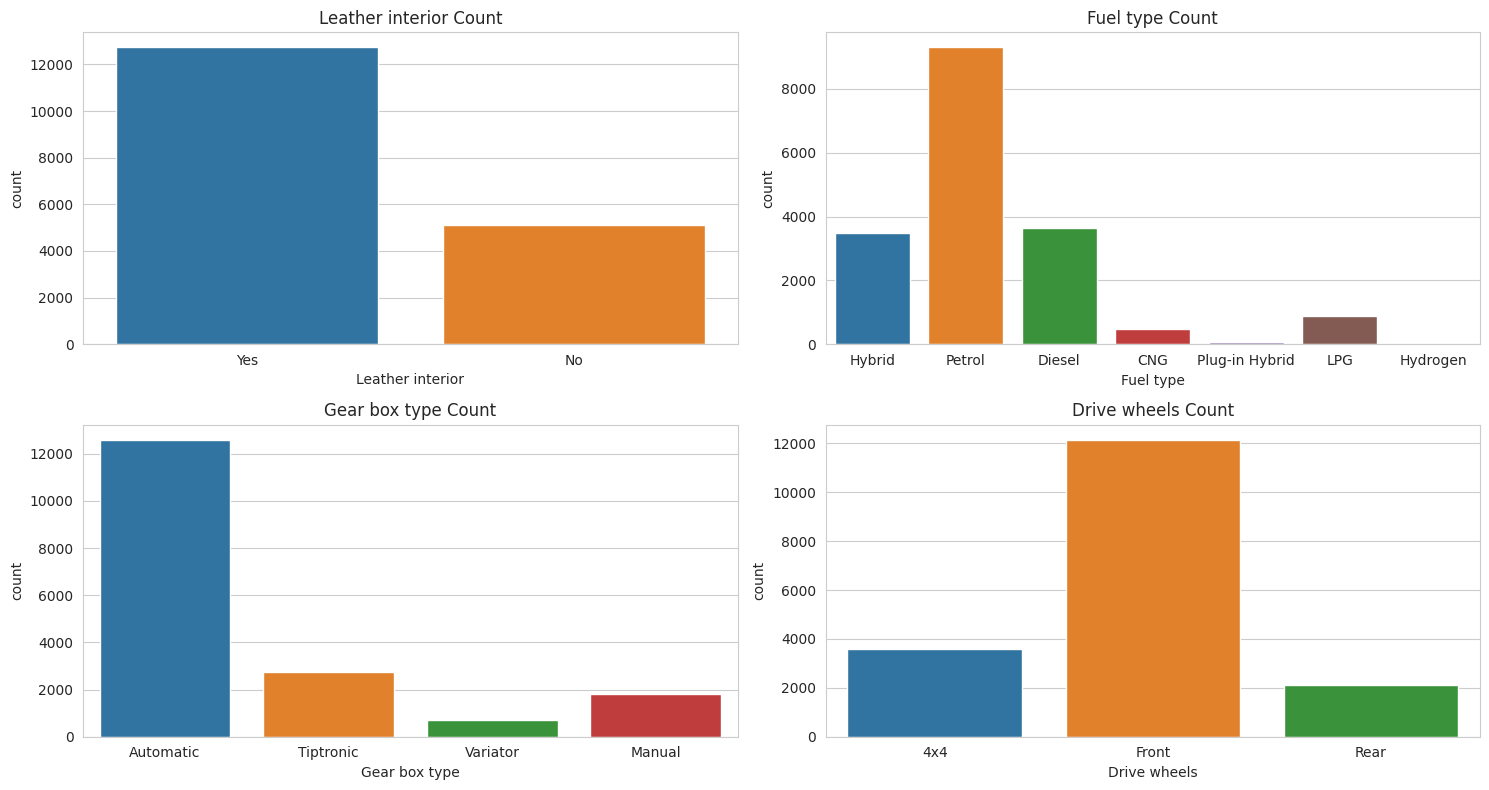

In [ ]:
cat_col = ('Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels')
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

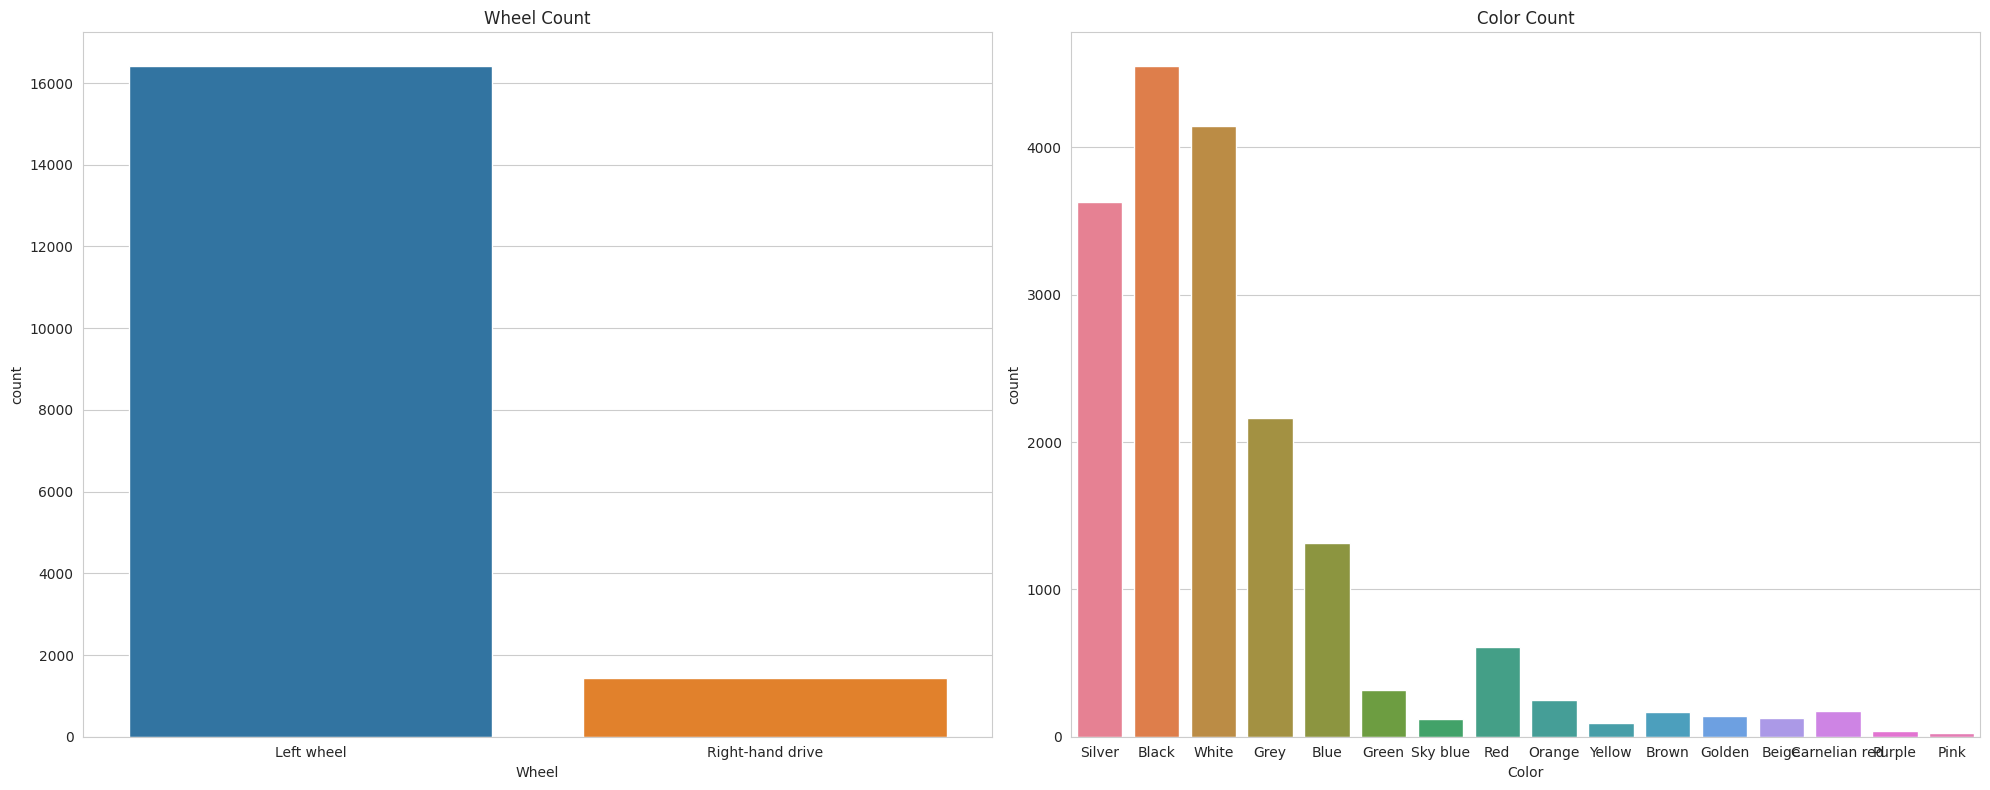

In [ ]:
cat_col = ('Wheel', 'Color')
plt.figure(figsize=(20, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(1, 2, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
df_cp = df.drop(columns='ID').copy()

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17869 non-null  int64  
 1   Levy              17869 non-null  float64
 2   Manufacturer      17869 non-null  object 
 3   Model             17869 non-null  object 
 4   Prod. year        17869 non-null  int64  
 5   Category          17869 non-null  object 
 6   Leather interior  17869 non-null  object 
 7   Fuel type         17869 non-null  object 
 8   Engine volume     17869 non-null  float64
 9   Mileage           17869 non-null  int64  
 10  Cylinders         17869 non-null  int64  
 11  Gear box type     17869 non-null  object 
 12  Drive wheels      17869 non-null  object 
 13  Wheel             17869 non-null  object 
 14  Color             17869 non-null  object 
 15  Airbags           17869 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

## Label Encode Binary data

In [ ]:
columns = ('Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel')
le_count = 1

le_encoders = {}

for col in columns:
  lbl = LabelEncoder()
  lbl.fit(df_cp[col])
  df_cp[col] = lbl.transform(df_cp[col])
  le_encoders[col] = lbl # encoder untuk tiap kolom kita simpan untuk deployment nanti
  le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [ ]:
# Simpan model encoder ke dalam file pickle
with open('le_encoder.pkl', 'wb') as f:
    pickle.dump(le_encoders, f)

## LeaveOneOutEncoder

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17869 non-null  int64  
 1   Levy              17869 non-null  float64
 2   Manufacturer      17869 non-null  object 
 3   Model             17869 non-null  object 
 4   Prod. year        17869 non-null  int64  
 5   Category          17869 non-null  object 
 6   Leather interior  17869 non-null  int64  
 7   Fuel type         17869 non-null  int64  
 8   Engine volume     17869 non-null  float64
 9   Mileage           17869 non-null  int64  
 10  Cylinders         17869 non-null  int64  
 11  Gear box type     17869 non-null  int64  
 12  Drive wheels      17869 non-null  int64  
 13  Wheel             17869 non-null  int64  
 14  Color             17869 non-null  object 
 15  Airbags           17869 non-null  int64  
dtypes: float64(2), int64(10), object(4)
memo

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import LeaveOneOutEncoder

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder()

# Fit and transform the entire DataFrame
df_encoded = encoder.fit_transform(df_cp, df_cp['Price'])

# Simpan model encoder ke dalam file pickle
with open('leave_one_out_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
# Select the columns to be encoded
columns_to_encode = ('Manufacturer', 'Model', 'Category')

for column in columns_to_encode:
  df_cp[column] = df_encoded[column]

In [ ]:
df_cp.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.000000,12119.823308,7071.267081,2010,17376.580781,1,2,3.5,186005,6,0,0,0,Silver,12
1,16621,1018.000000,13760.357843,7028.894737,2011,17375.885322,0,5,3.0,192000,6,2,0,0,Black,8
2,8467,906.299205,11132.210000,10785.350000,2006,11042.872302,0,5,1.3,200000,4,3,1,1,Black,2
3,3607,862.000000,12180.738878,8204.034483,2011,17378.633791,1,2,2.5,168966,4,0,0,0,White,0
4,11726,446.000000,11128.588889,10777.943182,2014,11041.700000,1,5,1.3,91901,4,0,1,0,Silver,4


## Encode Categorical Data

In [ ]:
# convert rest of categorical variable into dummy

df_cp = pd.get_dummies(df_cp, drop_first=True) # One-Hot Encoding

In [ ]:
df_cp

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.000000,12119.823308,7071.267081,2010,17376.580781,1,2,3.5,186005,6,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,16621,1018.000000,13760.357843,7028.894737,2011,17375.885322,0,5,3.0,192000,6,2,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8467,906.299205,11132.210000,10785.350000,2006,11042.872302,0,5,1.3,200000,4,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,12180.738878,8204.034483,2011,17378.633791,1,2,2.5,168966,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,11726,446.000000,11128.588889,10777.943182,2014,11041.700000,1,5,1.3,91901,4,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,12817.648692,7436.000000,1999,14622.500000,1,0,2.0,300000,4,1,2,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19233,15681,831.000000,19089.764311,11844.681909,2011,12431.194181,1,5,2.4,161600,4,2,1,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19234,26108,836.000000,19086.719042,27003.582011,2010,17373.881732,1,1,2.0,116365,4,0,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19235,5331,1288.000000,13771.426471,17119.691176,2007,17378.269694,1,1,2.0,51258,4,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_columns = df_cp.columns #kita simpan kolom2 hasil encoding untuk digunakan nanti
one_hot_columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Airbags',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow'],
      dtype='object')

# **Feature Scaling**

In [ ]:
df_tmp = df_cp.copy()

In [ ]:
y = df_tmp['Price'].values
X = df_tmp.drop(['Price'], axis=1)

In [ ]:
X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Airbags',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
sc_X = StandardScaler()
pickle.dump(sc_X.fit(X), open(f'scaler.pkl', 'wb'))
X = sc_X.fit_transform(X)



# Split Data Train and Data Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test

(array([[-0.66301979,  3.87303167,  2.4089883 , ..., -0.08256918,
         -0.54939597, -0.07349457],
        [-0.95152724,  1.24935966,  0.3161963 , ..., -0.08256918,
         -0.54939597, -0.07349457],
        [ 0.99074609, -0.06715999,  0.50069076, ..., -0.08256918,
          1.82018081, -0.07349457],
        ...,
        [ 0.02295613, -0.99958289, -0.67788952, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [-0.53422183, -0.07108003,  0.51069707, ..., -0.08256918,
          1.82018081, -0.07349457],
        [ 0.02295613,  1.46449211,  0.31495169, ..., -0.08256918,
         -0.54939597, -0.07349457]]),
 array([[-0.016454  , -0.47235039, -1.69744296, ..., -0.08256918,
          1.82018081, -0.07349457],
        [ 1.92839528, -0.47147491,  0.07305691, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [ 0.02295613, -1.78730982, -1.10300493, ..., -0.08256918,
          1.82018081, -0.07349457],
        ...,
        [ 0.02295613,  0.36405251,  1.10610089, ..., -

# **Machine Learning Model**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

## Model Evaluation

In [ ]:
# Definisikan model regresi
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR(kernel='rbf')
knn = KNeighborsRegressor()
nb = GaussianNB()
xgb = XGBRegressor()

# List dari model-model regresi
models_1 = [lr, dt, rf, knn, nb, xgb]

In [ ]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=4, shuffle=True, random_state=45)
    mse = make_scorer(mean_squared_error)

    mse_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=mse)
    score = mse_val_score.mean()
    return score

In [ ]:
col = ['Algorithm',  'R2_Score']
model_results = pd.DataFrame(columns=col)

models_name = ['Linear Regression', 'Desicion Tree', 'Random Forest',
               'K-Nearest Neighboor', 'GaussianNB', 'XGBoost']

i = 0
for model in models_1:
  models_pred = test_model(model)
  model_results.loc[i] = [models_name[i], models_pred]
  i += 1

model_results

,Algorithm,R2_Score
0,Linear Regression,8.223463e+07
1,Desicion Tree,4.220537e+06
2,Random Forest,2.260538e+06
3,K-Nearest Neighboor,5.136660e+07
4,GaussianNB,1.590193e+08
5,XGBoost,4.164688e+06


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(predictions, name):
    print('Model: ', name)

    # Hitung dan cetak mean squared error (MSE) dan R^2 score
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print('Mean Squared Error:', mse)
    print('R^2 Score:', r2)

In [ ]:
preds = [[], [], [], [], [], []]

for i, model in enumerate(models_1):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds

[array([ 4960.74122217, 18628.22066233,  3925.56907978, ...,
        15683.71621373,  7400.26264336,  8618.4853268 ]),
 array([ 3763.,   941.,  4704., ..., 12231.,  8781.,  3293.]),
 array([ 3763.  ,   941.  ,  4704.  , ..., 12592.42,  8780.94,  3294.71]),
 array([ 9439.4,   909.6,  5990. , ..., 21262.6,  7495. ,  1034.6]),
 array([20228,   110,  3300, ...,   125,  6800, 18500]),
 array([ 4035.3552,  1115.8618,  4767.2324, ..., 12414.778 ,  8436.336 ,
         3696.1406], dtype=float32)]

## Model Training and Prediction

In [ ]:
for i in range(len(preds)):
  evaluate_model(predictions = preds[i], name = str(models_1[i]).split('(')[0])

Model:  LinearRegression
Mean Squared Error: 83473590.79414539
R^2 Score: 0.3518699650447058
Model:  DecisionTreeRegressor
Mean Squared Error: 3250758.904588696
R^2 Score: 0.9747595082178964
Model:  RandomForestRegressor
Mean Squared Error: 1622938.9925868774
R^2 Score: 0.9873987030390285
Model:  KNeighborsRegressor
Mean Squared Error: 52025717.26311137
R^2 Score: 0.5960467301392334
Model:  GaussianNB
Mean Squared Error: 158704091.66172355
R^2 Score: -0.23225666342696116
Model:  XGBRegressor
Mean Squared Error: 4728388.642524056
R^2 Score: 0.9632864638144178


## Final Model

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)